### 1. Dataset Description  <a id='columns'>

SSize of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Huh! Here we take on the challenge! As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
    import pandas_profiling
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score, log_loss
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2
import collections
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from collections import Counter


C:\Users\sandeep.rathod\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\sandeep.rathod\AppData\Local\Continuum\anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\sandeep.rathod\AppData\Local\Continuum\anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\sandeep.rathod\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\sandeep.rathod\AppData\Local\Continuum\anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_

In [205]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_mode_interactivity = "all"

In [575]:
x1=pd.ExcelFile(r'Data_Train.xlsx')
x2=pd.ExcelFile(r'Test_set.xlsx')

In [576]:
x1.sheet_names

['Sheet1']

### create a list of six columns

1. Qualification
2. Experience
3. Rating
4. Place
5. Profile
6. Miscellaneous_Info
7. Fees

In [577]:
# Define the columns to be read

In [578]:
columns_read=['Airline','Date_of_Journey','Source','Destination','Route','Dep_Time','Arrival_Time','Duration','Total_Stops','Additional_Info'
             ,'Price']
columns_readt=['Airline','Date_of_Journey','Source','Destination','Route','Dep_Time','Arrival_Time','Duration','Total_Stops','Additional_Info']

### parse the data and read the six columns present in 7.1 sheet of data and skip first six rows and set skipfooter=14 and the column names as the list defined above

In [579]:
ds_input = x1.parse(u'Sheet1',names=columns_read)
ds_input.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [580]:
dst_input = x2.parse(u'Sheet1',names=columns_readt)
dst_input.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [581]:
#report = pandas_profiling.ProfileReport(ds_input)
#covert profile report as html file
#report.to_file("ds_input.html")

In [582]:
 ds_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10683 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10683 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [583]:
dst_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
Airline            2671 non-null object
Date_of_Journey    2671 non-null object
Source             2671 non-null object
Destination        2671 non-null object
Route              2671 non-null object
Dep_Time           2671 non-null object
Arrival_Time       2671 non-null object
Duration           2671 non-null object
Total_Stops        2671 non-null object
Additional_Info    2671 non-null object
dtypes: object(10)
memory usage: 208.8+ KB


In [584]:
#check duplicates
ds_input =ds_input.drop_duplicates()
ds_input.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10463 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10463 non-null object
Date_of_Journey    10463 non-null object
Source             10463 non-null object
Destination        10463 non-null object
Route              10463 non-null object
Dep_Time           10463 non-null object
Arrival_Time       10463 non-null object
Duration           10463 non-null object
Total_Stops        10463 non-null object
Additional_Info    10463 non-null object
Price              10463 non-null int64
dtypes: int64(1), object(10)
memory usage: 980.9+ KB


In [585]:
#combining the train and test 
y_train = ds_input['Price']
train_nomissing = ds_input.drop('Price',axis=1)
test_nomissing = dst_input
combined_set = pd.concat([train_nomissing, test_nomissing], axis = 0) # Stacks them vertically

In [586]:
 combined_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13134 entries, 0 to 2670
Data columns (total 10 columns):
Airline            13134 non-null object
Date_of_Journey    13134 non-null object
Source             13134 non-null object
Destination        13134 non-null object
Route              13134 non-null object
Dep_Time           13134 non-null object
Arrival_Time       13134 non-null object
Duration           13134 non-null object
Total_Stops        13134 non-null object
Additional_Info    13134 non-null object
dtypes: object(10)
memory usage: 1.1+ MB


combined_set['dup'] = 1

ds_dup =combined_set[combined_set.duplicated(subset=['Airline','Date_of_Journey','Source','Destination','Route','Dep_Time',
                                           'Arrival_Time','Duration','Total_Stops','Additional_Info'],keep='first')]

ds_dup

i=combined_set[combined_set.duplicated(subset=['Airline','Date_of_Journey','Source','Destination','Route','Dep_Time',
                                           'Arrival_Time','Duration','Total_Stops','Additional_Info'],keep='first')].index.tolist()

combined_set['dup'].iloc[i] = 2

 combined_set.info()

In [587]:
#spliting misc for fees
ds_date = combined_set["Date_of_Journey"].str.split("/",n=1,expand=True)
ds_date[0]=ds_date[0].str.replace("0",'')
ds_month= ds_date[1].str.split("/",n=1,expand=True)
ds_month[0]=ds_month[0].str.replace("0",'')

In [588]:
combined_set['day']= ds_date[0].astype(str).astype(int)
combined_set['month']= ds_month[0].astype(str).astype(int)

In [589]:
ds_dep_time = combined_set["Dep_Time"].str.split(":",n=1,expand=True)
ds_arr_time = combined_set["Arrival_Time"].str.split(":",n=1,expand=True)

ds_arr_min=ds_arr_time[1].str.split(" ",n=1,expand=True)
ds_arr_min[1][ds_arr_min[1].notnull()]=1
ds_arr_min[1][ds_arr_min[1].isnull()]=0

In [590]:
combined_set['dep_hour']= ds_dep_time[0].astype(str).astype(int)
combined_set['dep_min']= ds_dep_time[1].astype(str).astype(int)

In [591]:
combined_set['arr_hour']= ds_arr_time[0].astype(str).astype(int)
combined_set['arr_min']= ds_arr_min[0].astype(str).astype(int)
combined_set['over_night']= ds_arr_min[1].astype(str).astype(int)



In [592]:
ds_dur_min=combined_set['Duration'].str.split(" ",n=1,expand=True)
ds_dur_min[0]=ds_dur_min[0].str.replace("h",'')
ds_dur_min[0]=ds_dur_min[0].astype(str).astype(int)

ds_dur_min[1]=ds_dur_min[1].str.replace("m",'')
ds_dur_min[1].fillna(0,inplace=True)
ds_dur_min[1]=ds_dur_min[1].astype(str).astype(int)

In [593]:
combined_set['Destination']=combined_set['Destination'].str.replace("New Delhi",'Delhi')


In [594]:
combined_set['new_duration_min'] = ds_dur_min[0]*60 + ds_dur_min[1]

In [595]:
dummy1_combined_set=combined_set

In [596]:
#combined_set = dummy1_combined_set

### Data exploration

In [597]:
df_train =  pd.concat([combined_set[:train_nomissing.shape[0]],y_train], axis=1) # Up to the last initial training set row
dst_input = combined_set[train_nomissing.shape[0]:]

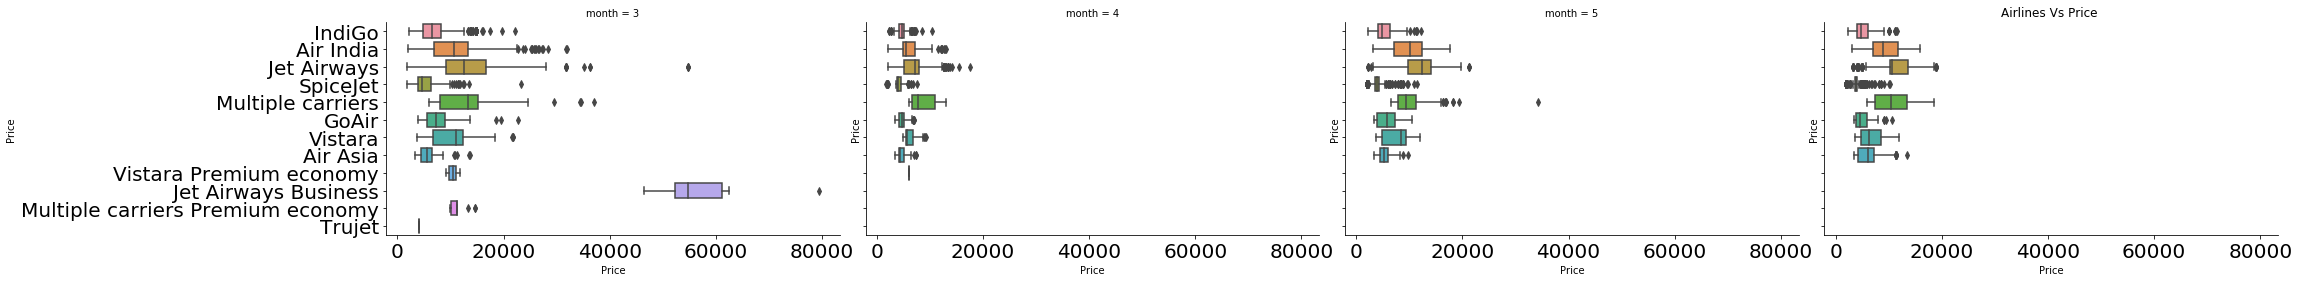

In [598]:
mx = sns.factorplot(y="Airline",x="Price",col='month', data=df_train, kind="box", size=4,aspect=2)
mx.set(ylabel='Price ')
plt.title('Airlines Vs Price ');
plt.show()

In [599]:
df_train =df_train.drop(df_train.loc[(df_train['Airline']=='Jet Airways') & (df_train['Price']>40000)].index.tolist()).reset_index(drop=True)
df_train =df_train.drop(df_train.loc[(df_train['Airline']=='SpiceJet') & (df_train['Price']>20000) ].index.tolist()).reset_index(drop=True)
df_train =df_train.drop(df_train.loc[(df_train['Airline']=='Air India') & (df_train['Price']>30000) ].index.tolist()).reset_index(drop=True)
df_train =df_train.drop(df_train.loc[(df_train['Airline']=='GoAir') & (df_train['Price']>20000) ].index.tolist()).reset_index(drop=True)
df_train =df_train.drop(df_train.loc[(df_train['Airline']=='Jet Airways Business') & (df_train['Price']>70000) ].index.tolist()).reset_index(drop=True)
#df_train =df_train.drop(df_train.loc[(df_train['Airline']=='Trujet')].index.tolist()).reset_index(drop=True)

#df_train =df_train.drop(df_train.loc[(df_train['Airline']=='Air Asia') & (df_train['Price']>13000) ].index.tolist()).reset_index(drop=True)
#df_train =df_train.drop(df_train.loc[(df_train['Airline']=='Multiple carriers') & (df_train['Price']>36000) ].index.tolist()).reset_index(drop=True)

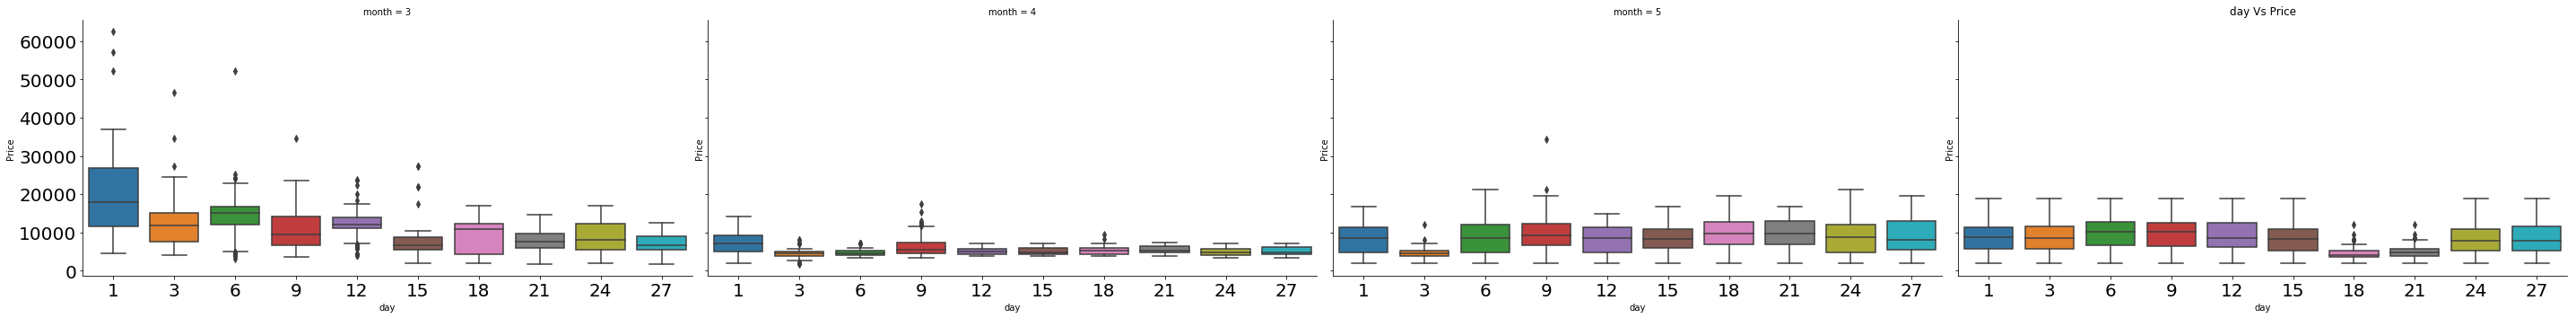

In [600]:
mx = sns.factorplot(x="day", y="Price", data=df_train, kind="box",col='month', size=5 ,aspect=2)
mx.set(xlabel='day')
mx.set(ylabel= 'Price')
plt.title('day Vs Price');
plt.show()

<Figure size 1080x720 with 0 Axes>

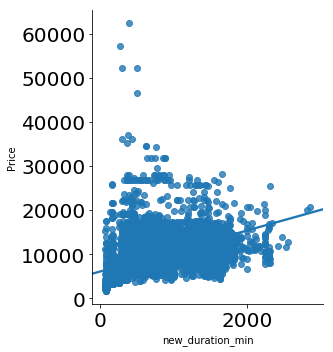

In [601]:
plt.figure(figsize=(15,10))
sns.lmplot(x='new_duration_min',y='Price',data=df_train,fit_reg=True);

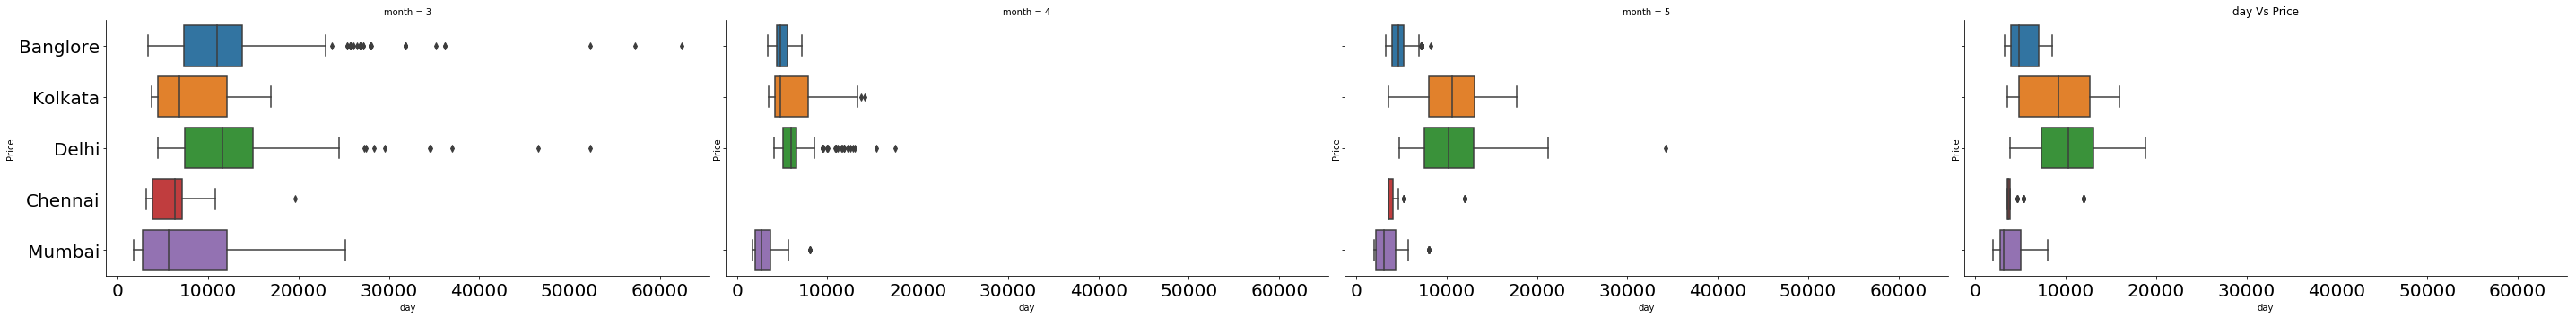

In [602]:
mx = sns.factorplot(y="Source", x="Price", data=df_train, col='month',kind="box", size=5 ,aspect=2)
mx.set(xlabel='day')
mx.set(ylabel= 'Price')
plt.title('day Vs Price');
plt.show()

In [603]:
df_train.loc[ (df_train['Source']=='Banglore')& (df_train['Price']>50000) & (df_train['Additional_Info']=='No info') ]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,day,month,dep_hour,dep_min,arr_hour,arr_min,over_night,new_duration_min,Price
657,Jet Airways Business,01/03/2019,Banglore,Delhi,BLR → BOM → DEL,05:45,10:45,5h,1 stop,No info,1,3,5,45,10,45,0,300,52229


In [604]:
#df_train =df_train.drop(df_train.loc[(df_train['Source']=='Banglore')& (df_train['Price']>50000) & (df_train['Additional_Info']=='No info')].index.tolist()).reset_index(drop=True)


In [605]:
df_train.loc[(df_train['month']==5) & (df_train['Source']=='Delhi')& (df_train['Price']>30000)& (df_train['Airline']=='Multiple carriers') ]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,day,month,dep_hour,dep_min,arr_hour,arr_min,over_night,new_duration_min,Price
6896,Multiple carriers,9/05/2019,Delhi,Cochin,DEL → BOM → COK,12:50,01:30 10 May,12h 40m,1 stop,No info,9,5,12,50,1,30,1,760,34273


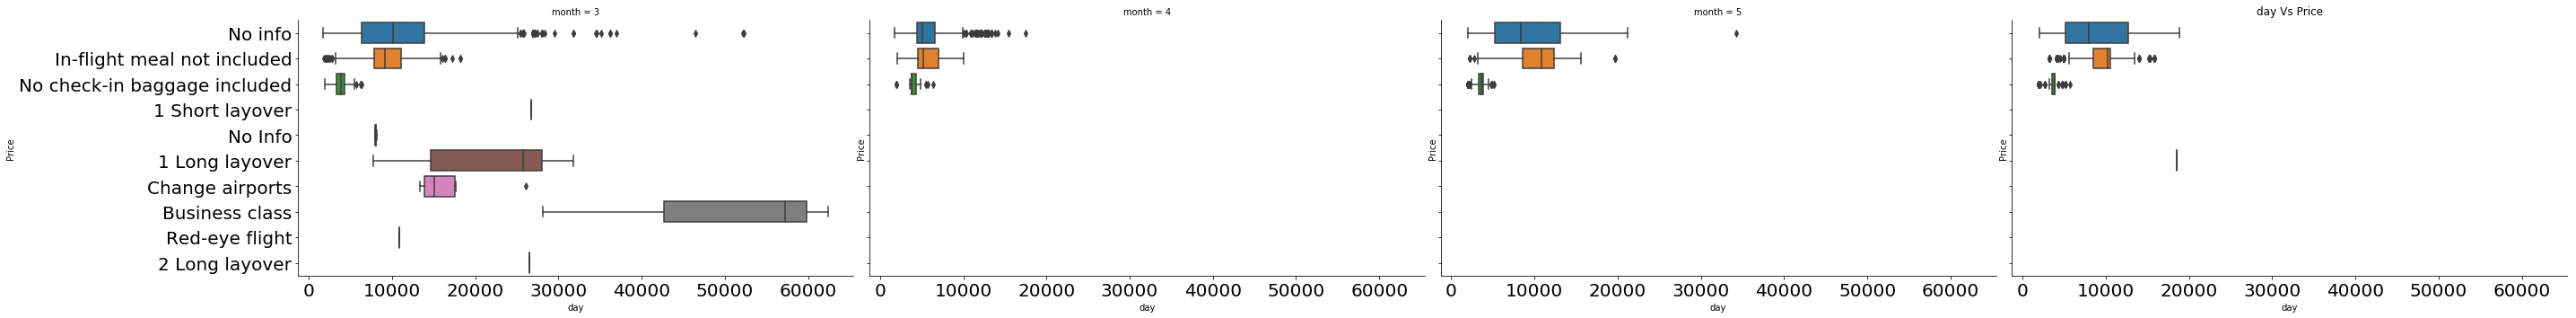

In [606]:
mx = sns.factorplot(y="Additional_Info", x="Price", data=df_train, kind="box",col='month', size=5 ,aspect=2)
mx.set(xlabel='day')
mx.set(ylabel= 'Price')
plt.title('day Vs Price');
plt.show()

In [607]:
#df_train =df_train.drop(df_train.loc[(df_train['month']==5) & (df_train['Source']=='Delhi')& (df_train['Price']>30000) ].index.tolist()).reset_index(drop=True)
#df_train = df_train.drop(df_train.loc[(df_train['Airline']=='Multiple carriers') & (df_train['month']==5) & (df_train['Price']>30000)].index.tolist()).reset_index(drop=True)
#df_train = df_train.drop(df_train.loc[ (df_train['month']==3) & (df_train['Price']>30000)& (df_train['arr_hour']==4)].index.tolist()).reset_index(drop=True)

In [608]:
#df_train =df_train.drop(df_train.loc[(df_train['month']==3)& (df_train['Price']>50000)].index.tolist()).reset_index(drop=True)


In [1]:
mx = sns.factorplot(x="Response", y="Product_Info_4", data=df_train, kind="box", size=5 ,aspect=2)
mx.set(xlabel='day')
mx.set(ylabel= 'Price')
plt.title('day Vs Price');
plt.show()

NameError: name 'sns' is not defined

In [610]:
#df_train =df_train.drop(df_train.loc[(df_train['month']==5)& (df_train['Price']>30000)].index.tolist()).reset_index(drop=True)
#df_train.loc[(df_train['month']==5)& (df_train['Price']>30000)]

In [611]:
price_df_train = pd.DataFrame(df_train)

In [612]:
price_df_train.to_excel('price_df_train.xlsx')

In [613]:
#combining the train and test 
y_train = df_train['Price']
train_nomissing = df_train.drop('Price',axis=1)
test_nomissing = dst_input
combined_set = pd.concat([train_nomissing, test_nomissing], axis = 0) # Stacks them vertically

### 4. Feature Engineering  <a id='feature'>

In [614]:
# agegroup below 30 and above 59 as a categorical feature
def fri_output(Ex):
    mn,dy=Ex
    fr=0
    if (mn == 3 & dy in [8,15,22,29]):
        fr=1
    elif (mn == 4 & dy in [5,12,19,26]):
        fr=1
    elif (mn == 5 & dy in [3,10,17,24,31]):
        fr=1
    elif (mn == 6 & dy in [7,14,21,28]):
        fr=1
    return fr
      
combined_set['is_friday'] = combined_set[['month','day']].apply(fri_output, axis=1)


# agegroup below 30 and above 59 as a categorical feature
def dep_output(Ex):
    
    
    if (Ex >= 6 & Ex <=12 ):
        fr='morning'
    elif (Ex > 12 & Ex <=21 ):
        fr='noon'
    elif (Ex > 21 & Ex <6 ):
        fr='night'
    return fr
      
combined_set['is_mnn'] = combined_set['dep_hour'].apply(dep_output)

# agegroup below 30 and above 59 as a categorical feature
def mon_output(Ex):
    mn,dy=Ex
    fr=0
    if (mn == 3 & dy in [4,11,18,25]):
        fr=1
    elif (mn == 4 & dy in [1,8,15,22,29]):
        fr=1
    elif (mn == 5 & dy in [6,13,20,27]):
        fr=1
    elif (mn == 6 & dy in [3,10,17,24]):
        fr=1
    return fr
      
combined_set['is_monday'] = combined_set[['month','day']].apply(mon_output, axis=1)

# agegroup below 30 and above 59 as a categorical feature
def jet_output(Ex):
    mn,dy=Ex
    if (mn in ["Jet Airways"] and  dy in ["Business class"]):
        dy='No info'
    return dy
      
combined_set['Additional_Info'] = combined_set[['Airline','Additional_Info']].apply(jet_output, axis=1)

# agegroup below 30 and above 59 as a categorical feature
def summer_output(Ex):
    fr=0
    if (Ex == 3):
        fr=1
    return fr
      
combined_set['is_summer'] = combined_set['month'].apply(summer_output)

# Data time format

combined_set['Date_of_Journey'] = pd.to_datetime(combined_set['Date_of_Journey'],dayfirst = True)

def days_output(Ex):
    fr=0
    fr = (Ex-pd.to_datetime('01/03/2019',dayfirst = True)).days
    
    return fr
      
combined_set['number_days'] = combined_set['Date_of_Journey'].apply(days_output)

def stp_output(Ex):
    
    if (Ex =='non-stop'):
        Ex=0
    elif (Ex =='1 stop'):
        Ex=1
    elif (Ex =='2 stops'):
        Ex=2 
    elif (Ex =='3 stops'):
        Ex=3
    elif (Ex =='4 stops'):
        Ex=4
    return Ex
      
combined_set['Total_Stops'] = combined_set['Total_Stops'].apply(stp_output)
combined_set['Total_Stops'] = combined_set['Total_Stops'].astype(int)

# agegroup below 30 and above 59 as a categorical feature
def src_output(Ex):

    if (Ex == 'Banglore'):
        Ex='blr'
    elif (Ex =='Kolkata'):
        Ex='ccu'
    elif (Ex =='Delhi'):
        Ex='del'  
    elif (Ex =='Chennai'):
        Ex='del'
    elif (Ex =='Mumbai'):
        Ex='bom'
    elif (Ex =='Cochin'):
        Ex='cok'
    elif (Ex =='Hyderabad'):
        Ex='hyd'
    return Ex
      
combined_set['Source'] = combined_set['Source'].apply(src_output)
combined_set['Destination'] = combined_set['Destination'].apply(src_output)

In [615]:
combined_set.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,day,month,dep_hour,dep_min,arr_hour,arr_min,over_night,new_duration_min,is_friday
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,24,3,22,20,1,10,1,170,0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,1,5,5,50,13,15,0,445,0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,9,6,9,25,4,25,1,1140,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,12,5,18,5,23,30,0,325,0
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,1,3,16,50,21,35,0,285,0


# agegroup below 30 and above 59 as a categorical feature
def cheap_output(Ex):
    if (Ex in ['IndiGo','SpiceJet','GoAir',
               'Air Asia','Trujet']):
        fr='LC'
    elif (Ex in ['Vistara Premium economy','Jet Airways Business','Multiple carriers Premium economy']):
         fr='premium'
    elif (Ex in ['Air India','Jet Airways','Multiple carriers','Vistara']):
         fr='full'
    return fr
      
combined_set['is_cheap'] = combined_set['Airline'].apply(cheap_output)

### Removing Punctuation  <a id='erf'>

In [616]:
combined_set['Route'] = combined_set['Route'].str.replace('[^\w\s]','')
combined_set['Route'].head()

0              BLR  DEL
1    CCU  IXR  BBI  BLR
2    DEL  LKO  BOM  COK
3         CCU  NAG  BLR
4         BLR  NAG  DEL
Name: Route, dtype: object

### Removal of Stop Words <a id='erf'>

In [617]:
import nltk.corpus
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
combined_set['Route'] = combined_set['Route'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
combined_set['Route'].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sandeep.rathod\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0            BLR DEL
1    CCU IXR BBI BLR
2    DEL LKO BOM COK
3        CCU NAG BLR
4        BLR NAG DEL
Name: Route, dtype: object

In [618]:
from textblob import TextBlob
combined_set['Route'][:5].apply(lambda x: str(TextBlob(x).correct()))

0            BLR DEL
1    CCU IXR BBI BLR
2    DEL LKO BOM COK
3        CCU NAG BLR
4        BLR NAG DEL
Name: Route, dtype: object

### All these pre-processing steps are essential and help us in reducing our vocabulary clutter so that the features produced in the end are more effective. <a id='erf'>

### TF-IDFTF-IDF<a id='erf'>

In [619]:
combined_set_dummy3 = combined_set

In [620]:
combined_set = combined_set_dummy3

In [621]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=None, lowercase=True, analyzer='word',
stop_words= 'english',ngram_range=(1,4))
train_vect = tfidf.fit_transform(combined_set['Route'])

tfidf_misc = TfidfVectorizer(max_features=None, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
train_vect_misc = tfidf_misc.fit_transform(combined_set['Source'])

In [622]:
tfidf_vect = pd.DataFrame(
    (count, word) for word, count in zip(
    train_vect.toarray().tolist()[0],   
    tfidf.get_feature_names()))
tfidf_vect.columns = ['Word', 'Count']
tfidf_vect.sort_values('Count', ascending=False, inplace=True)


In [623]:
tfidf_vect.head(10)

,Word,Count
68,blr del,0.803076
35,blr,0.464591
277,del,0.373127
342,del maa cok,0.000000
355,del udr bom cok,0.000000
354,del udr bom,0.000000
353,del udr,0.000000
352,del trv cok,0.000000
351,del trv,0.000000
350,del rpr nag bom,0.000000


In [624]:
dfs=pd.DataFrame(train_vect.toarray().tolist(),columns= tfidf.get_feature_names())
#dfs_misc=pd.DataFrame(train_vect_misc.toarray().tolist(),columns= tfidf_misc.get_feature_names())

In [625]:
combined_set.reset_index(drop=True,inplace=True)

In [626]:
dfs.reset_index(drop=True,inplace=True)
#dfs_misc.reset_index(drop=True,inplace=True)

In [627]:
#dfs.values[dfs.values > 0] = 1


In [628]:
combined_set= pd.concat([combined_set,dfs], axis=1)

In [629]:
#combined_set=combined_set.drop(['Route','Dep_Time','Arrival_Time','Duration','new_duration_min'],axis=1)
combined_set=combined_set.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration','new_duration_min'],axis=1)


In [630]:
combined_set=pd.get_dummies(data=combined_set)

In [631]:
combined_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13126 entries, 0 to 13125
Columns: 563 entries, day to Additional_Info_Red-eye flight
dtypes: float64(518), int32(7), int64(1), uint8(37)
memory usage: 52.8 MB


In [632]:
day_dummies = pd.get_dummies(combined_set.day, prefix='day')
combined_set = pd.concat([combined_set,day_dummies], axis=1)
month_dummies = pd.get_dummies(combined_set.month, prefix='month')
combined_set = pd.concat([combined_set,month_dummies], axis=1)
arr_hour_dummies = pd.get_dummies(combined_set.arr_hour, prefix='arr_hour')
combined_set = pd.concat([combined_set,arr_hour_dummies], axis=1)
#arr_min_dummies = pd.get_dummies(combined_set.arr_min, prefix='arr_min')
#combined_set = pd.concat([combined_set,arr_min_dummies], axis=1)

#is_arr_peak_dummies = pd.get_dummies(combined_set.is_arr_peak, prefix='is_peak')
#combined_set = pd.concat([combined_set,is_arr_peak_dummies], axis=1)

In [633]:
combined_set=combined_set.drop(['day','month','arr_hour'],axis=1)

In [634]:
combined_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13126 entries, 0 to 13125
Columns: 598 entries, dep_hour to arr_hour_23
dtypes: float64(518), int32(4), int64(1), uint8(75)
memory usage: 53.1 MB


### Scaling dataset   <a id='pcalr'>

In [635]:
df_train = combined_set[:train_nomissing.shape[0]] # Up to the last initial training set row
df_test = combined_set[train_nomissing.shape[0]:] # Past the last initial training set row

In [636]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_train_arr_scld = sc.fit_transform(df_train)
df_train_scld=pd.DataFrame(df_train_arr_scld,columns=df_train.columns)
df_test_arr_scld = sc.transform(df_test)
df_test_scld=pd.DataFrame(df_test_arr_scld,columns=df_test.columns)

In [637]:
# Spitting the data into Test and Train from combined_set_scld

#train = df_train_scld # Up to the last initial training set row
#test = df_test_scld # Past the last initial training set row

train = df_train # Up to the last initial training set row
test = df_test # Past the last initial training set row
labels = y_train


In [638]:
train.shape

(10455, 598)

In [639]:
test.shape

(2671, 598)

In [640]:
# Keep one set of train data for further use
train1=train.copy()
test1=test.copy()
y_train1=y_train.copy()

In [641]:
#train=train1
#test=test1
#y_train=y_train1

### Let's start building models

In [642]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR

# Define a cross validation strategy

In [643]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [644]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

# Base models
LASSO Regression :
This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's Robustscaler() method on pipeline

# SVR :

# XGBoost : :

In [711]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.03, 
                             learning_rate=0.065, max_depth=7, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0, reg_lambda=1,
                             subsample=0.55, silent=1,
                             random_state =7, nthread = -1)

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.08, max_depth=7, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0, reg_lambda=1,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [712]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = model_xgb.predict(test)
print(rmsle(y_train, xgb_train_pred))

487.73232939976225


In [713]:
price_XG_pred = pd.DataFrame(xgb_pred)

In [714]:
price_XG_pred.to_excel('price_test_reslt_xgb1.xlsx')

# Light GBM : :

In [723]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=31,
                              learning_rate=0.05, n_estimators=2800,feature_fraction = 0.75,
                              feature_fraction_seed=9,min_data_in_leaf =15
                                                         
                              )

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.08, n_estimators=3000,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [724]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)

In [725]:
print(rmsle(y_train, lgb_train_pred))

616.0780837332228


In [726]:
lgb_pred = model_lgb.predict(test.values)

In [727]:
price_pred_lgb = pd.DataFrame(lgb_pred)

In [728]:
price_pred_lgb.to_excel('price_test_reslt_lgbm.xlsx')

# Ensemble prediction:

In [729]:
ens_train =  xgb_train_pred*0.25 + lgb_train_pred*0.75

In [730]:
ens_train_pd = pd.DataFrame(ens_train)

In [731]:
ens_train_pd.to_excel('ens_train_pd.xlsx')

In [732]:

'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,xgb_train_pred*0.15 +lgb_train_pred*0.85 ))

RMSLE score on train data:
589.0347919964128


In [733]:
#ensemble = stacked_pred*0.15 + xgb_pred*0.5 + gb_pred*0.35

ensemble =  xgb_pred*0.15 + lgb_pred*0.85

In [734]:
ensemble

array([14469.20700155,  4401.2960876 , 12771.42126769, ...,
       16246.62038869, 12917.82069704,  7818.14653448])

In [735]:
price_pred_ensb = pd.DataFrame(ensemble)

In [736]:
price_pred_ensb.to_excel('price_test_reslt_ensb1.xlsx')